 # Using PointChargeCEF to fit INS of $\mathrm{Yb_3Mg_2Sb_3O_{14}}$
By Zhiling Dun, Oct. 2020

In [1]:
import sys
import copy
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
sys.path.append("/Users/dunzhiling/Documents/Research/Program/Python/PointChargeFit/arXivProgram/")
import PointChargeCEF_Oct2020 as CEF


# creast a CEFmodel object named EMSO
YMSO=CEF.CEFmodel('Yb3+')

# prepare dataset from files
Exp_1 = np.loadtxt("Exp_Yb-tripod_240meV_5K.dat", skiprows=10, usecols=[0,1,2])     #INS data
Exp_sus = np.loadtxt("Exp_Yb-tripod_susceptibility.dat", skiprows=1)     #susceptibility data
Exp_MH_5K = np.loadtxt("Exp_Yb-tripod_MH.dat", skiprows=103, max_rows=99,  usecols=[1,2])
Exp_MH_10K = np.loadtxt("Exp_Yb-tripod_MH.dat", skiprows=203, max_rows=99,  usecols=[1,2])
Exp_MH_40K = np.loadtxt("Exp_Yb-tripod_MH.dat", skiprows=303, max_rows=99,  usecols=[1,2])

#input observed Energy levels, put 0 for uncertain levels. 
YMSO.levels_obs=[0, 0, 69, 69, 89, 89, 114, 114]  

# input 6 inelastic neutron scattering data, one susceptibility data, thre Magnetization file
YMSO.addINSdata(Exp_1,  Ei = 240,   Temperature = 5,  SpecialFWHM=[88,92, 3])
YMSO.addSUSdata(Exp_sus, B=0.1, Field=[0,0,0]) # powder
YMSO.addMHdata(Exp_MH_5K, Temperature=5, Field=[0,0,0]) # MH 5K
YMSO.addMHdata(Exp_MH_10K, Temperature=10, Field=[0,0,0]) # MH 5K
YMSO.addMHdata(Exp_MH_40K, Temperature=40, Field=[0,0,0]) # MH 5K
 


# create a point charge model, PC_variable stores the names of the PC variables, PC_value stores the numerical values
# then add 8 Point charge in spherical coordination
YMSO.PC_variable = 'R1', 'R2', 'R3', 'Theta2', 'Theta3', 'Phi', 'q1', 'q2', 'q3'

YMSO.clearPC()
YMSO.addPC('R1, 0, 0, q1')
YMSO.addPC('R1, 180, 0, q1')
YMSO.addPC('R2, Theta2, Phi, q2')
YMSO.addPC('R2, Theta2, 360-Phi, q2')
YMSO.addPC('R2, 180-Theta2, 180-Phi, q2')
YMSO.addPC('R2, 180-Theta2, 180+Phi, q2')
YMSO.addPC('R3, 180-Theta3, 0, q3')
YMSO.addPC('R3, Theta3, 180, q3')



## Plot  inelastic neutron scattering pattern from Initial PC parameters 

[  0.           0.          59.85340152  59.85340152  80.31079801
  80.31079801 104.82863782 104.82863782]


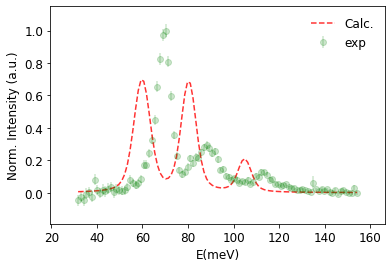

In [3]:
YMSO.PC_value_ini = np.array([1.6, 1.5, 1.4, 78, 76, 59, 0.5 ,0.3, 0.15]) 

YMSO.FWHM=1.5

# define a function to plot 6 INS pattern together
# Evaluate_pattern(dataset = i, Plotcontrol=True, UsePCini=True) automatically plot a singel INS dataset and return the Chi^2 of calcualted pattern 
# if UsePCini = True, use

YMSO.Evaluate_pattern(dataset = 0, Plotcontrol=True, UsePCini=True)

print(YMSO.eigenval)

##  Point Charge fit

In [4]:
YMSO.PCfit(Fit_variable=['R1', 'R2', 'R3', 'FWHM'])
# use default method ('Nelder-Mead') to fine mininum, fix q1, q2, q3

 final_simplex: (array([[1.54210053, 1.55852858, 1.4757315 , 1.49346635],
       [1.54203564, 1.55947712, 1.47628933, 1.49344702],
       [1.54198775, 1.55896395, 1.47632463, 1.4935685 ],
       [1.54196874, 1.55814276, 1.47520649, 1.49437703],
       [1.54210328, 1.5583279 , 1.47572308, 1.49422971]]), array([0.19657377, 0.1965795 , 0.19658077, 0.19658396, 0.19658992]))
           fun: 0.1965737720878462
       message: 'Optimization terminated successfully.'
          nfev: 89
           nit: 50
        status: 0
       success: True
             x: array([1.54210053, 1.55852858, 1.4757315 , 1.49346635])

Eigen-enerigies =  [0.00000000e+00 1.13686838e-13 6.91203785e+01 6.91203785e+01
 8.84350301e+01 8.84350301e+01 1.15039295e+02 1.15039295e+02]
 Rotational matrix =  
 [[ 0.99977274  0.          0.02131809]
 [ 0.          1.          0.        ]
 [-0.02131809  0.          0.99977274]] 
 Rotation angle = 1.2215291811289841 

g_diagnal =  
 [[ 5.18370145e+00  0.00000000e+00  2.29942463e-18]
 [ 0.00000000e+00  3.43544058e+00  0.00000000e+00]
 [-1.70061435e-17  0.00000000e+00  1.59951234e+00]]


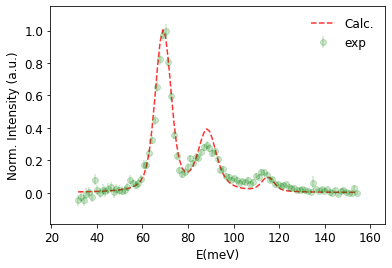

In [5]:
print("Eigen-enerigies = ",YMSO.eigensys()[0])
YMSO.Evaluate_pattern(dataset = 0, Plotcontrol=True);
YMSO.diagonalG();

In [6]:
YMSO.writefile("YMSO_PCfit_R1R2R3.dat");  # wirte results to a data file named "EMSO_PCfit1.dat"

## Calculate susceptibility 

[  2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.  85.  90.  95.
 100. 105. 110. 115. 120. 125. 130. 135. 140. 145. 150. 155. 160. 165.
 170. 175. 180. 185. 190. 195. 200. 205. 210. 215. 220. 225. 230. 235.
 240. 245. 250. 255. 260. 265. 270. 275. 280. 285. 290. 295. 300. 305.
 310. 315. 320. 325. 330. 335. 340. 345. 350. 355. 360. 365. 370. 375.
 380. 385. 390. 395. 400.] [  1.5477937    2.30882292   3.06799601   3.82440236   4.57775421
   5.32794109   6.0749188    6.81867244   7.55920168   8.29651405
   9.03062155   9.76153892  10.48928254  11.21386986  11.93531898
  12.65364845  13.36887705  14.08102372  14.79010746  15.49614727
  16.19916215  16.89917101  17.5961927   18.29024597  18.98134947
  19.66952173  20.35478116  21.03714603  21.71663451  25.07155691
  28.35721488  31.57572559  34.72912391  37.81936685  40.84834
  43.81786577  46

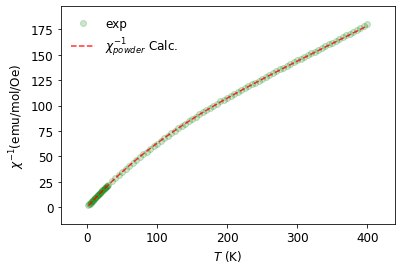

In [5]:
# Power inverse suceptibility without Weiss_field correction
#YMSO.readBkq("YMSO_PCfit_R1R2R3.dat", printcontol=False)
x,y=YMSO.Powder_InverseSusceptibility(B=0.1, dataset=0)
print(x,y)

(array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
 array([ 1.98542988,  3.52003885,  5.02992018,  6.52581544,  8.0081408 ,
         9.47738911, 10.93368627, 12.37743334, 13.80874431]))

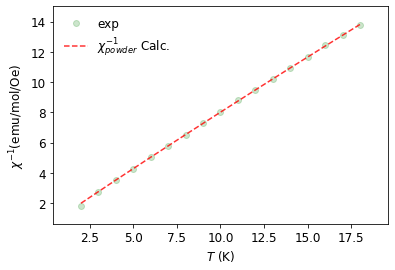

In [6]:
# Power inverse suceptibility with Weiss_field correction
YMSO.Powder_InverseSusceptibility(B=0.1, dataset=0, Temperature_range=np.arange(2,20,2), Weiss_field = 0.3)

##  Calculate  MH-curve

The power-averaging might take quite with the Weiss_field Correaction


(array([ 0.       ,  1.5555556,  3.1111111,  4.6666667,  6.2222222,
         7.7777778,  9.3333333, 10.8888889, 12.4444444, 14.       ]),
 array([0.       , 0.6595063, 1.1540466, 1.4583586, 1.6287054, 1.7219868,
        1.7743676, 1.8055981, 1.825904 , 1.8405061]))

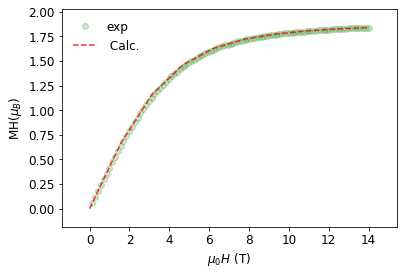

In [9]:
H = np.linspace(0,14,10)
YMSO.Powder_Magnetization(dataset=0, B_range=H, intergration_step=10)

H(T)    M_powder(5K), M_powder(10K), M_powder(40K)
[1.         0.45406264 0.23376261 0.06270164]
[2.         0.84954706 0.45929082 0.125267  ]
[3.         1.15726053 0.6696285  0.18756125]
[4.         1.37900829 0.85994852 0.24945239]
[5.         1.53196779 1.02778691 0.31081258]
[6.         1.63547376 1.17275654 0.37151941]
[7.         1.70536926 1.29598672 0.43145698]
[9.33333333 1.79496173 1.51121014 0.56772632]
[11.66666667  1.83669777  1.6504832   0.69804025]
[14.          1.86043159  1.74058349  0.82148283]
Time used: 0:00:23.834552


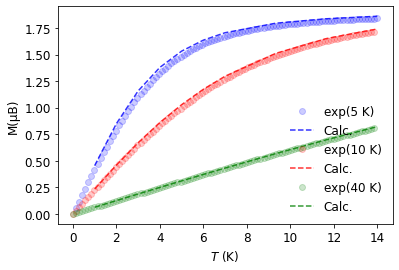

In [7]:
Field=np.concatenate((np.linspace(1, 6, 6), np.linspace(7, 14, 4)), axis=None)
MH=np.zeros((len(Field),len(YMSO.EXP_MH)+1))
MH[:,0]=Field
time1=datetime.now()
print('H(T)    M_powder(5K), M_powder(10K), M_powder(40K)')
for i in range(len(Field)):
    for j in range(len(YMSO.EXP_MH)):        
        MH[i][j+1]= float(YMSO.Powder_Magnetization(dataset=j, B_range=[Field[i]], Weiss_field=0 ,intergration_step=10, Plotcontrol=False)[1])      
    print(MH[i])
print('Time used:', datetime.now()-time1)

color=['b','r', 'g']
for i in range(len(YMSO.EXP_MH)):
    plt.plot(YMSO.EXP_MH[i].x, YMSO.EXP_MH[i].y, 'o', color=color[i], alpha=0.2, label='exp(%d K)' %YMSO.EXP_MH[i].Temperature);
    plt.plot(MH[:,0], MH[:,i+1], '--', color=color[i], alpha=0.8, label='Calc.');
Frontsize=12
plt.legend(loc='lower right', frameon=False,fontsize=Frontsize)    
plt.xlabel('$T$ (K)',fontsize=Frontsize);
plt.ylabel('M(μB)',fontsize=Frontsize);
plt.xticks(fontsize=Frontsize);
plt.yticks(fontsize=Frontsize);

### add Weiss_field Correction

H(T)    M_powder(5K), M_powder(10K), M_powder(40K)
[1.         0.40964846 0.22095068 0.06174283]
[2.         0.7801716  0.43539924 0.1233583 ]
[3.         1.08544265 0.63761088 0.18471999]
[4.         1.31801756 0.82321033 0.24570429]
[5.         1.48539594 0.98947985 0.30619083]
[6.         1.60178529 1.13534403 0.36606447]
[7.         1.68153499 1.26110938 0.42521526]
[9.33333333 1.78415212 1.48477674 0.55985672]
[11.66666667  1.83110932  1.63201422  0.68886715]
[14.          1.85692502  1.72797513  0.81134653]
Time used: 0:45:43.246946


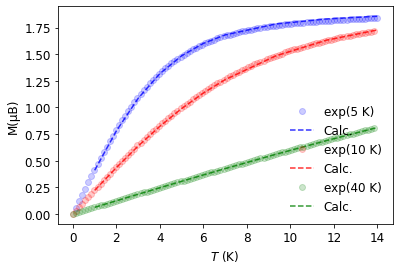

In [8]:
print('H(T)    M_powder(5K), M_powder(10K), M_powder(40K)')
for i in range(len(Field)):
    for j in range(len(YMSO.EXP_MH)):        
        MH[i][j+1]= float(YMSO.Powder_Magnetization(dataset=j, B_range=[Field[i]], Weiss_field=0.3 ,intergration_step=10, Plotcontrol=False)[1])      
    print(MH[i])
print('Time used:', datetime.now()-time1)

color=['b','r', 'g']
for i in range(len(YMSO.EXP_MH)):
    plt.plot(YMSO.EXP_MH[i].x, YMSO.EXP_MH[i].y, 'o', color=color[i], alpha=0.2, label='exp(%d K)' %YMSO.EXP_MH[i].Temperature);
    plt.plot(MH[:,0], MH[:,i+1], '--', color=color[i], alpha=0.8, label='Calc.');
Frontsize=12
plt.legend(loc='lower right', frameon=False,fontsize=Frontsize)    
plt.xlabel('$T$ (K)',fontsize=Frontsize);
plt.ylabel('M(μB)',fontsize=Frontsize);
plt.xticks(fontsize=Frontsize);
plt.yticks(fontsize=Frontsize);